In [65]:
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as ticker


# Initialize the runtime service.
service = QiskitRuntimeService()
backend = service.get_backend("ibm_osaka")

In [58]:
# Download calibration data for the last N days
N = 30
errors_data = []


def get_readout_errors(backend, t):
    p = backend.properties(datetime=t)
    errors = []
    for i in range(127):
        errors.append(p.readout_error(qubit=i))
    return errors


for d in np.arange(N):
    today = datetime(day=20, month=3, year=2024, hour=12)
    t = today - timedelta(days=int(d))
    print(t)
    errors = get_readout_errors(backend, t)
    errors_data.append({"t": t, "errors": errors})

err_array = np.array([[e["errors"][i] for i in range(127)] for e in errors_data])

2024-03-20 12:00:00
2024-03-19 12:00:00
2024-03-18 12:00:00
2024-03-17 12:00:00
2024-03-16 12:00:00
2024-03-15 12:00:00
2024-03-14 12:00:00
2024-03-13 12:00:00
2024-03-12 12:00:00
2024-03-11 12:00:00
2024-03-10 12:00:00
2024-03-09 12:00:00
2024-03-08 12:00:00
2024-03-07 12:00:00
2024-03-06 12:00:00
2024-03-05 12:00:00
2024-03-04 12:00:00
2024-03-03 12:00:00
2024-03-02 12:00:00
2024-03-01 12:00:00
2024-02-29 12:00:00
2024-02-28 12:00:00
2024-02-27 12:00:00
2024-02-26 12:00:00
2024-02-25 12:00:00
2024-02-24 12:00:00
2024-02-23 12:00:00
2024-02-22 12:00:00
2024-02-21 12:00:00
2024-02-20 12:00:00


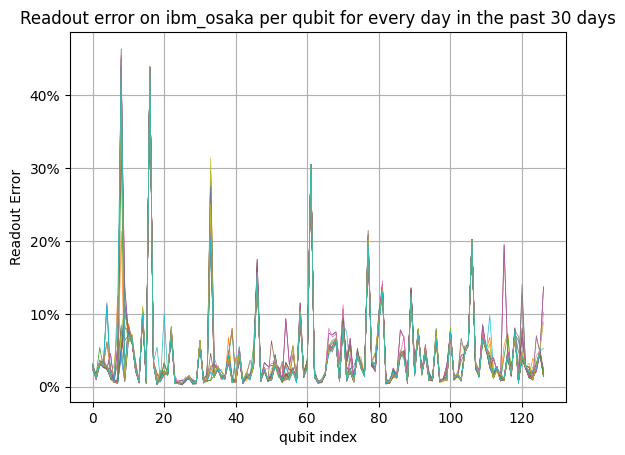

In [76]:
for d in errors_data:
    plt.plot(d["errors"], label=d["t"], linewidth=0.5)

plt.xlabel("qubit index")
plt.ylabel("Readout Error")
plt.grid()
plt.title(
    f"Readout error on {backend.name} per qubit for every day in the past {N} days"
)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

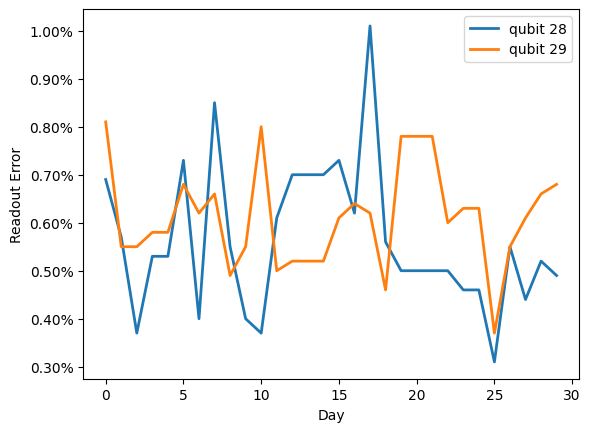

In [74]:
qubits = [28, 29]

for q in qubits:
    plt.plot(err_array[:, q], label=f"qubit {q}", linewidth=2)

plt.legend()
plt.xlabel("Day")
plt.ylabel("Readout Error")
# Format y axis as percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

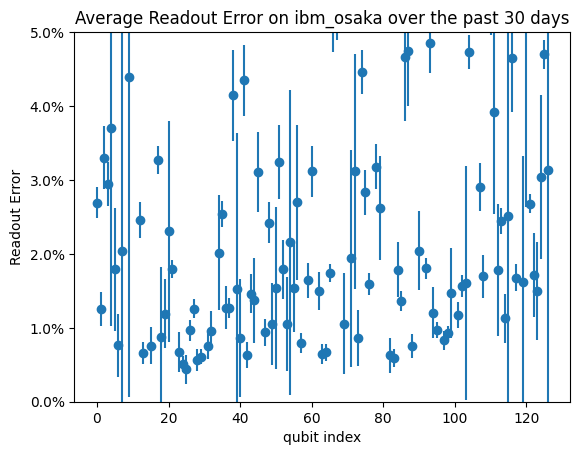

In [75]:
mean_re = np.mean(err_array, axis=0)
std_re = np.std(err_array, axis=0)

plt.errorbar(range(127), mean_re, yerr=std_re, fmt="o", label="Mean Readout Error")
plt.ylim(0, 0.05)
plt.xlabel("qubit index")
plt.ylabel("Readout Error")
plt.title(f"Average Readout Error on {backend.name} over the past {N} days")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))